# Assignment 2
trying some shits here \
mainly about internship

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# [จำนวนประชากรอายุ 15 ปีขึ้นไป ที่มีพฤติกรรมการดื่มสุรา](https://data.go.th/dataset/os_07_00004)
- ถึง 58 obsolete

In [32]:
# 2547 - 2558 too obsolete
legit_pop_raw = pd.read_csv('https://apis1.nso.go.th/data?table=OS_07_0004_01&format=csv') 
df = legit_pop_raw.pivot_table(values='value', index= 'year').reset_index()
df
# legit_pop_raw

,year,value
0,2547,7.669309e+06
1,2550,1.705562e+07
2,2554,6.399207e+06
3,2557,6.531672e+06
4,2558,6.140865e+06


<Axes: xlabel='year', ylabel='value'>

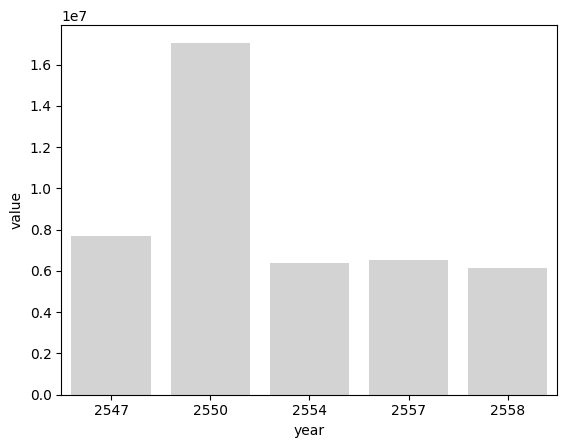

In [33]:
sns.barplot(data = df, x='year', y = 'value', color='lightgray')

# [ความชุกของผู้บริโภคเครื่องดื่มแอลกอฮอล์ในประชากรอายุ 15 ปีขึ้นไป](https://catalog.nso.go.th/dataset/os_05_00007)
- ล่าสุดเท่าที่จะหาได้แล้ว
- อัตราความชุกของนักดื่มปัจจุบัน (Prevalence of current drinkers): ร้อยละของผู้ดื่มสุราอย่างน้อย หนึ่งหน่วยดื่มมาตรฐาน (ประมาณ 10 กรัมแอลกอฮอล์โดยน้าหนัก) ในรอบ 12 เดือนก่อนการสารวจแต่ ละครั้ง ในประชากรไทยอายุ 15 ปีขึ้นไปทั่วประเทศ

In [34]:
prevalence_raw = pd.read_csv("https://apis1.nso.go.th/data?table=OS_05_0007_01&format=csv")
prev_pivot = prevalence_raw.loc[prevalence_raw['sex'] == 'รวม']
prev_pivot

,year,sex,value,unit,source
0,2547,รวม,32.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
1,2549,รวม,31.5,ร้อยละ,สำนักงานสถิติแห่งชาติ
2,2550,รวม,30.0,ร้อยละ,สำนักงานสถิติแห่งชาติ
3,2552,รวม,32.0,ร้อยละ,สำนักงานสถิติแห่งชาติ
4,2554,รวม,31.5,ร้อยละ,สำนักงานสถิติแห่งชาติ
5,2557,รวม,32.3,ร้อยละ,สำนักงานสถิติแห่งชาติ
6,2560,รวม,28.4,ร้อยละ,สำนักงานสถิติแห่งชาติ


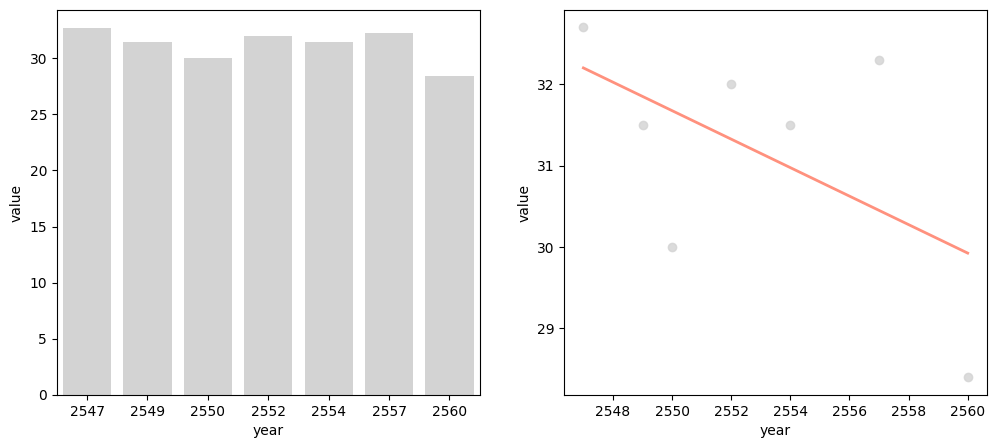

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=prev_pivot, x = 'year', y='value', color='lightgray', ax = axes[0]);
sns.regplot(data=prev_pivot, x = 'year', y='value', color='lightgray', scatter=True, ci=None , line_kws={"color":"tomato","alpha":0.7,"lw":2} , ax = axes[1]);

# [อัตราการดื่มสุราของประชากรอายุ 15-24 ปี](https://catalog.nso.go.th/dataset/os_05_00006/resource/0d3dfa07-6969-4a71-8e67-a706f574206e)

In [36]:
import matplotlib.pyplot as plt

preva2_raw = pd.read_csv("https://apis1.nso.go.th/data?table=OS_05_0006_01&format=csv")
preva2_raw

,year,value,unit,source
0,2544,21.6,ร้อยละ,สำนักงานสถิติแห่งชาติ
1,2547,23.5,ร้อยละ,สำนักงานสถิติแห่งชาติ
2,2549,23.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
3,2550,21.9,ร้อยละ,สำนักงานสถิติแห่งชาติ
4,2552,24.2,ร้อยละ,สำนักงานสถิติแห่งชาติ
5,2554,23.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
6,2557,25.2,ร้อยละ,สำนักงานสถิติแห่งชาติ
7,2560,23.9,ร้อยละ,สำนักงานสถิติแห่งชาติ


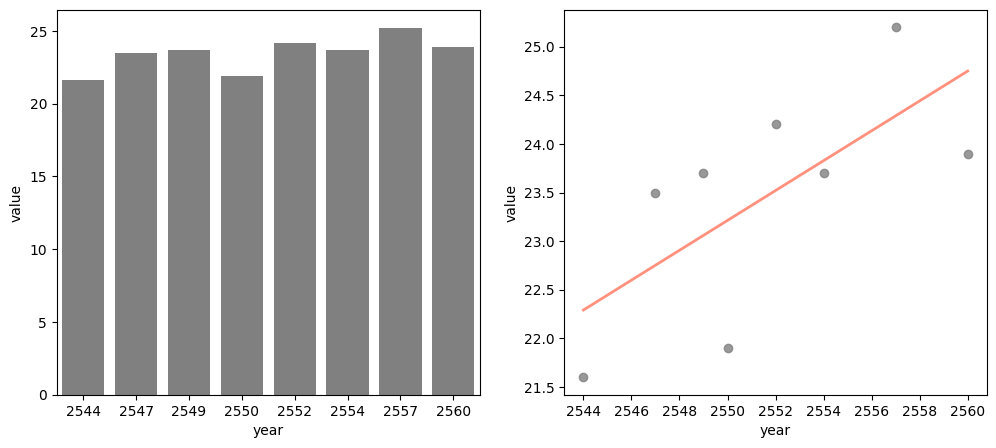

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data = preva2_raw, x = 'year', y = 'value', color='gray', ax=axes[0]);
sns.regplot(x='year', y='value', data=preva2_raw, scatter=True, ci=None, color='gray', line_kws={"color":"tomato","alpha":0.7,"lw":2}, ax = axes[1]);

# [ความชุกการดื่มสุราแยกตามอายุ](https://alcoholstudy.in.th/index.php?ct=report_drinker&proc=main&year1=2564&year2=7&chart_id=4)

In [38]:
by_age = pd.read_csv('./files/ความชุกการดื่มสุราแยกตามอายุ.csv', skipfooter=1)
by_age_melt = pd.melt(by_age, id_vars=['ช่วงอายุ'], var_name='ปี', value_name='ความชุก')
by_age_melt
# by_age

/var/folders/0_/b7_gb01d3b5656shdfbkv9sc0000gn/T/ipykernel_8098/1931513396.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  by_age = pd.read_csv('./files/ความชุกการดื่มสุราแยกตามอายุ.csv', skipfooter=1)


,ช่วงอายุ,ปี,ความชุก
0,ผู้ดื่มใน 12 เดือนที่ผ่านมา,2544,32.60
1,อายุ 15-19 ปี,2544,11.04
2,อายุ 20-44 ปี,2544,38.10
3,อายุ 45-59 ปี,2544,38.10
4,อายุ 60 ปีขึ้นไป,2544,20.00
5,ผู้ดื่มใน 12 เดือนที่ผ่านมา,2547,32.70
6,อายุ 15-19 ปี,2547,13.74
7,อายุ 20-44 ปี,2547,38.70
8,อายุ 45-59 ปี,2547,35.30
9,อายุ 60 ปีขึ้นไป,2547,19.30


/Users/chindanai/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  func(*args, **kwargs)
/Users/chindanai/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  func(*args, **kwargs)
/Users/chindanai/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  func(*args, **kwargs)
/Users/chindanai/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  func(*args, **kwargs)
/Users/chindanai/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 3594 (\N{THAI CHARACTER CHO CHANG}) missing from current font.
  func(*args, **kwargs)
/Users/chindanai/anaconda3/lib/python3.11/site-packages/IPython

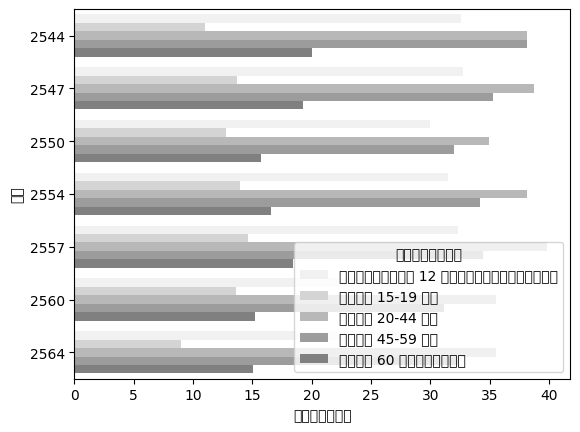

In [44]:
sns.barplot(data = by_age_melt, y = 'ปี', x = 'ความชุก', hue='ช่วงอายุ', color='gray');